In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':18})


In [4]:
df = pd.read_csv('../data/metadata/2020-05-14_pg1_3_all.csv')
df.head()

,Unnamed: 0,listing_id,image_file,prop_type,listing_price,beds,baths,sqft,address,city,state,zipcode
0,0,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m1108769346x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
1,1,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m867679501xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
2,2,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2412943192x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
3,3,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2841480592x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
4,4,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m758422910xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5572 non-null   int64 
 1   listing_id     5572 non-null   object
 2   image_file     5572 non-null   object
 3   prop_type      5572 non-null   object
 4   listing_price  5572 non-null   object
 5   beds           5572 non-null   object
 6   baths          5572 non-null   object
 7   sqft           5572 non-null   object
 8   address        5572 non-null   object
 9   city           5572 non-null   object
 10  state          5572 non-null   object
 11  zipcode        5572 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 522.5+ KB


In [6]:
count_by_city = df.groupby('city').count()['image_file']
count_by_city



city
Arvada          844
Aurora          796
Centennial      700
Denver         1250
Lakewood        768
Thornton        597
Westminster     617
Name: image_file, dtype: int64

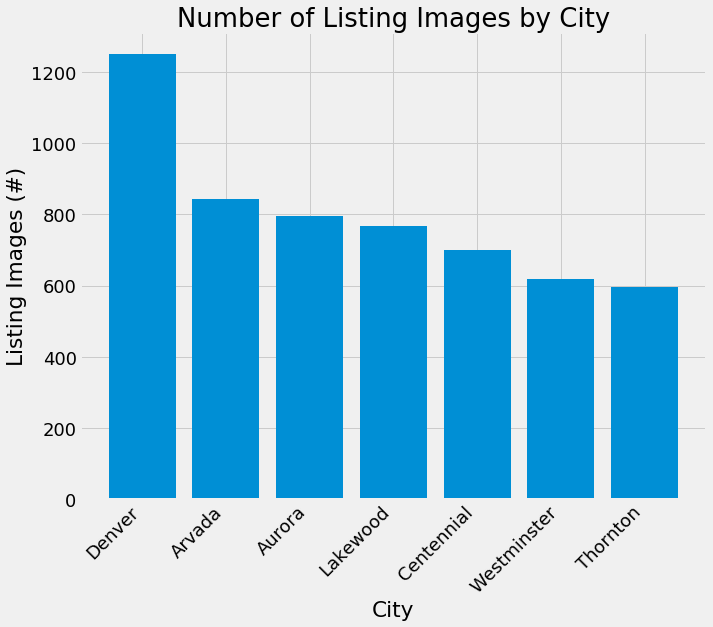

In [8]:
# dist of collected listings
def bar_chart_desc(tick_labels, values, xlabel, ylabel, title):
    desc_idx = np.argsort(np.array(values))
    desc_y = values[desc_idx][::-1]
    desc_x = tick_labels[desc_idx][::-1]


    fig, ax = plt.subplots(1,figsize=(10,8))
    ax.bar(desc_x, desc_y)
    ax.set_xticklabels(desc_x, rotation=45, ha='right')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
bar_chart_desc(count_by_city.index, count_by_city.values, 'City',"Listing Images (#)", "Number of Listing Images by City")


In [10]:
by_listing = df.groupby('listing_id').count()
by_listing

,Unnamed: 0,image_file,prop_type,listing_price,beds,baths,sqft,address,city,state,zipcode
listing_id,,,,,,,,,,,
Arvada_CO_1_0,25,25,25,25,25,25,25,25,25,25,25
Arvada_CO_1_1,37,37,37,37,37,37,37,37,37,37,37
Arvada_CO_1_10,32,32,32,32,32,32,32,32,32,32,32
Arvada_CO_1_12,26,26,26,26,26,26,26,26,26,26,26
Arvada_CO_1_15,11,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...
Westminster_CO_3_2,23,23,23,23,23,23,23,23,23,23,23
Westminster_CO_3_3,9,9,9,9,9,9,9,9,9,9,9
Westminster_CO_3_4,38,38,38,38,38,38,38,38,38,38,38


In [10]:

bar_chart_desc(count_by_city.index, count_by_city.values, 'City',"Listing Images (#)", "Number of Listing Images by City")

array([ 33,  40,  45, 293, 310, 312, 348, 388, 412, 610])